# Neural Network to train MNIST dataset in TensorFlow

#### import required packages

In [106]:
import tensorflow as tf
from keras.layers import Input, Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

#### Load MNIST data

In [107]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'X_train: {X_train.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_test: {Y_test.shape}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


#### Visualize first 6 images

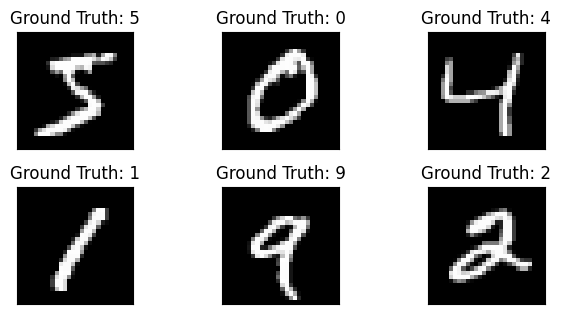

In [108]:
for i in range(6):
    plt.subplot(3, 3, 1 + i)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(f'Ground Truth: {Y_train[i]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [109]:
# Normalizing input data for better convergence
X_train = X_train / 255
X_test = X_test / 255

#### Define model

In [110]:
model = Sequential(
    [   Input((28,28)),
        Flatten(),
        Dense(128, activation = 'relu', name = 'layer_1'),
        # Dense(32, activation = 'relu', name = 'layer_2'),
        Dense(10, activation = 'softmax')
    ]
)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [111]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)           │ (None, 784)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ layer_1 (Dense)               │ (None, 128)           │      100,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Train your model

In [112]:
model.fit(x = X_train, y = Y_train, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7328 - loss: 1.0243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.3543
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9156 - loss: 0.2952
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2646
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.2428
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9394 - loss: 0.2217
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9417 - loss: 0.2071
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9473 - loss: 0.1892
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9497 - loss: 0.1764
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9526 - loss: 0.1677


#### Evaluate model on test data

In [113]:
model.evaluate(x = X_test, y = Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1900


[0.1636049896478653, 0.9523000121116638]